## Data from finlab official API

In [2]:
import pandas as pd
import talib
import talib.abstract as abstract
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from finlab import data
import finlab

finlab.login("tiyybDDkjfj91vIexZCvLwL84ClFRIKE2yQwZBKP/dpT8FMnMdr9dxTKxwt29KjD#free")

輸入成功!


## Auto reload file

In [2]:
%load_ext autoreload
%autoreload 2

## 測試取得興櫃個股/上市/上櫃/上市櫃個股 成交量資料

In [ ]:
# ============== 興櫃成交資訊 ================
# rotc_volume_df = data.get('rotc_price:成交股數')
# rotc_volume_df = data.get('rotc_price:成交金額')
# rotc_volume_df = data.get('rotc_price:成交筆數')
# print(rotc_volume_df.tail())

# ============= 各類股指數(含大盤)成交資訊 ============

# volume_df = data.get('stock_index_vol:成交股數')
volume_df = data.get('stock_index_vol:成交金額')
# volume_df = data.get('stock_index_vol:成交筆數')

# print(volume_df.head())
# print(volume_df.tail())
# print(volume_df.columns)

print(volume_df['上市一般股票'].tail())
print(volume_df['上櫃一般股票'].tail())
# print(volume_df['上市ETF'].tail())

# ====================== 個股成交資訊 ====================

# volume_df = data.get('price:成交股數')
# volume_df = data.get('price:成交筆數')
# volume_df = data.get('price:成交金額')
# print(volume_df['2330'].tail())
# print(volume_df.columns)

## 測試取得大盤指數

In [ ]:
index_df = data.get('benchmark_return:發行量加權股價報酬指數')      # 加權報酬指數，是把配股、配息加回去再投資，重新計算，稱為加權股價報酬指數，能真正衡量出長期報酬率變化以及市場的長期表現
print(index_df.shape)
print(index_df.tail())
print()

close_df = data.get('stock_index_price:收盤指數')                 # 各類股和ETF的指數，只有收盤價資訊
print(close_df.shape)
print(close_df.tail())
print()

twii_close_df = data.get('taiex_total_index:收盤指數')            # 大盤的指數，有開高低收的資訊
twii_df = twii_close_df.rename(columns={'TAIEX': '台股指數'})    
print(twii_df.shape)
print(twii_df.tail())
print()
twii = twii_df['台股指數']
print(twii.tail())

## 測試取得個股"日"本益比 / 股價淨值比 / 殖利率

In [25]:
pe = data.get('price_earning_ratio:本益比')
pe.tail()

,1101,1102,1103,1104,1107,1108,1109,1110,1201,1203,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2022-06-14,13.97,10.75,16.70,10.19,NaN,16.69,10.08,71.30,20.00,17.28,...,4.02,11.61,18.07,NaN,NaN,14.07,NaN,18.84,10.46,8.52
2022-06-15,13.95,10.67,16.83,10.33,NaN,17.08,10.26,73.33,20.05,17.44,...,4.07,11.56,18.79,NaN,NaN,14.07,NaN,18.49,10.52,8.52
2022-06-16,13.94,10.62,16.70,10.28,NaN,16.92,10.23,72.41,20.10,17.62,...,4.02,11.37,18.50,NaN,NaN,14.09,NaN,18.07,10.48,8.31
2022-06-17,13.80,10.70,16.61,10.21,NaN,16.85,10.15,70.56,19.71,17.64,...,4.04,11.16,18.36,NaN,NaN,14.07,NaN,17.29,10.40,8.15
2022-06-20,13.54,10.44,16.28,10.12,NaN,16.46,10.05,71.48,19.51,17.44,...,4.02,10.90,18.36,NaN,NaN,13.54,NaN,17.09,10.42,7.54


## 測試取得籌碼資料

In [14]:
# ===================== 個股 三大法人買賣超 =====================
# investTrust_df = data.get('institutional_investors_trading_summary:投信買賣超股數')
# print("len(investTrust_df): ", len(investTrust_df))
# print(investTrust_df.head())
# print(investTrust_df.tail())
# print('----------------------------')

# ===================== 個股 內部人董監持股 =====================
# internal_chip_df = data.get('internal_equity_changes:董監持有股數')
# print("len(internal_chip_df): ", len(internal_chip_df))
# print(internal_chip_df.head())
# print(internal_chip_df.tail())
# print('----------------------------')

# ===================== 大盤 三大法人買賣超 =====================
# investTrust_df = data.get('institutional_investors_trading_all_market_summary:買賣超')
# print("len(investTrust_df): ", len(investTrust_df))
# print(investTrust_df.head())
# print(investTrust_df.tail())
# print('----------------------------')

# ===================== 大盤 融資融券餘額 =====================
print('------------- 大盤 融資融券餘額 ---------------')
margin_balance_df = data.get('margin_balance:融資券總餘額')
print("len(margin_balance_df): ", len(margin_balance_df))
# print(margin_balance_df.head())
print(margin_balance_df.tail())

# ===================== 大盤 融資融券買超 =====================
print('------------- 大盤 融資融券買超 ---------------')
margin_balance_buy_df = data.get('margin_balance:融資券總買進')
print("len(margin_balance_buy_df): ", len(margin_balance_buy_df))
# print(margin_balance_buy_df.head())
print(margin_balance_buy_df.tail())

# ===================== 大盤 融資融券賣超 =====================
print('------------- 大盤 融資融券賣超 ---------------')
margin_balance_sell_df = data.get('margin_balance:融資券總賣出')
print("len(margin_balance_sell_df): ", len(margin_balance_sell_df))
# print(margin_balance_sell_df.head())
print(margin_balance_sell_df.tail())

# ===================== 大盤 現金(券)總償還 =====================
print('------------- 大盤 現金(券)總償還 ---------------')
margin_balance_repay_df = data.get('margin_balance:現金(券)總償還')
print("len(margin_balance_repay_df): ", len(margin_balance_repay_df))
# print(margin_balance_repay_df.head())
print(margin_balance_repay_df.tail())

------------- 大盤 融資融券餘額 ---------------
len(margin_balance_df):  3810
            上市融券交易張數   上市融資交易張數      上市融資交易金額  上櫃融券交易張數   上櫃融資交易張數  \
date                                                                 
2022-06-14  485566.0  8236047.0  2.415741e+11   94155.0  1727691.0   
2022-06-15  503172.0  8204268.0  2.404860e+11   92140.0  1724178.0   
2022-06-16  519880.0  8155529.0  2.355401e+11   90980.0  1709038.0   
2022-06-17  504445.0  8039615.0  2.316988e+11   86817.0  1694205.0   
2022-06-20  493762.0  7866552.0  2.227023e+11   80824.0  1667491.0   

                上櫃融資交易金額  
date                      
2022-06-14  6.756217e+10  
2022-06-15  6.738961e+10  
2022-06-16  6.636906e+10  
2022-06-17  6.560749e+10  
2022-06-20  6.384860e+10  
------------- 大盤 融資融券買超 ---------------
len(margin_balance_buy_df):  3810
            上市融券交易張數  上市融資交易張數      上市融資交易金額  上櫃融券交易張數  上櫃融資交易張數      上櫃融資交易金額
date                                                                          
2022-06-14   59103

In [24]:
# 融資今日餘額 = data.get('margin_transactions:融資今日餘額')
# 融資今日餘額.tail()

融資券總餘額 = data.get('margin_balance:融資券總餘額')
融資券總餘額['上市融資買賣超'] = 融資券總餘額['上市融資交易金額']-融資券總餘額['上市融資交易金額'].shift()
print(融資券總餘額.tail())
benchmark = data.get('benchmark_return:發行量加權股價報酬指數')
benchmark_squeeze = benchmark.squeeze()
print(f"------------------ benchmark.tail() ------------------")
print(benchmark.tail())
print(f"------------------ benchmark_squeeze.tail() ------------------")
print(benchmark_squeeze.tail())

            上市融券交易張數   上市融資交易張數      上市融資交易金額  上櫃融券交易張數   上櫃融資交易張數  \
date                                                                 
2022-06-14  485566.0  8236047.0  2.415741e+11   94155.0  1727691.0   
2022-06-15  503172.0  8204268.0  2.404860e+11   92140.0  1724178.0   
2022-06-16  519880.0  8155529.0  2.355401e+11   90980.0  1709038.0   
2022-06-17  504445.0  8039615.0  2.316988e+11   86817.0  1694205.0   
2022-06-20  493762.0  7866552.0  2.227023e+11   80824.0  1667491.0   

                上櫃融資交易金額       上市融資買賣超  
date                                    
2022-06-14  6.756217e+10  1.740600e+07  
2022-06-15  6.738961e+10 -1.088070e+09  
2022-06-16  6.636906e+10 -4.945933e+09  
2022-06-17  6.560749e+10 -3.841289e+09  
2022-06-20  6.384860e+10 -8.996461e+09  
------------------ benchmark.tail() ------------------
            發行量加權股價報酬指數
date                   
2022-06-14     31936.87
2022-06-15     31844.32
2022-06-16     31584.23
2022-06-17     31194.99
2022-06-20     30656.95

In [15]:
融資今日餘額 = data.get('margin_transactions:融資今日餘額')
融資券總餘額 = data.get('margin_balance:融資券總餘額')
融資券總餘額 = 融資券總餘額.loc[融資今日餘額.index.intersection(融資券總餘額.index)]
融資券總餘額['上市融資買賣超'] = (融資券總餘額['上市融資交易金額']-融資券總餘額['上市融資交易金額'].shift()).fillna(0)/100000000
# 融資券總餘額['上櫃融資買賣超'] = (融資券總餘額['上櫃融資交易金額']-融資券總餘額['上櫃融資交易金額'].shift()).fillna(0)/100000000

close = data.get('price:收盤價')
benchmark = data.get('benchmark_return:發行量加權股價報酬指數').squeeze()
# 融資總餘額 = 融資券總餘額[['上市融資交易金額','上櫃融資交易金額']].sum(axis=1)
融資總餘額 = 融資券總餘額[['上市融資交易金額']].sum(axis=1)
融資餘額市值 = (融資今日餘額*close*1000).sum(axis=1)
融資維持率 = (融資餘額市值/融資總餘額)
融資維持率

date
2009-01-05    1.738617
2009-01-06    1.755304
2009-01-07    1.779094
2009-01-08    1.682059
2009-01-09    1.682248
                ...   
2022-06-14    1.986755
2022-06-15    1.975936
2022-06-16    1.930274
2022-06-17    1.923016
2022-06-20    1.870915
Length: 3314, dtype: float64

## 取得大盤開高低收資訊

In [4]:
open_ = data.get('taiex_total_index:開盤指數')
close = data.get('taiex_total_index:收盤指數')
high = data.get('taiex_total_index:最高指數')
low = data.get('taiex_total_index:最低指數')
volume = data.get('stock_index_vol:成交金額')

taiex_df = pd.DataFrame({
    'open': open_['TAIEX'],
    'high': high['TAIEX'],
    'low': low['TAIEX'],
    'close': close['TAIEX'],
    'volume': volume['上市一般股票']
}).astype(float)

print(taiex_df.head())
print()
print(taiex_df.tail())

               open     high      low    close  volume
date                                                  
1999-01-05  6310.41  6310.41  6111.64  6152.43     NaN
1999-01-06  6082.02  6280.93  5988.06  6199.91     NaN
1999-01-07  6280.38  6409.55  6181.62  6404.31     NaN
1999-01-08  6371.34  6492.87  6371.34  6421.75     NaN
1999-01-11  6472.02  6492.90  6392.49  6406.99     NaN

                open      high       low     close        volume
date                                                            
2022-06-09  16643.95  16643.95  16557.54  16621.34  1.876454e+11
2022-06-10  16581.81  16581.81  16403.33  16460.12  1.791256e+11
2022-06-13  16295.07  16295.07  16055.89  16070.98  2.174147e+11
2022-06-14  15975.17  16067.80  15869.06  16047.37  2.144031e+11
2022-06-15  16025.84  16106.75  15981.56  15999.25  2.131144e+11


## 測試看一下每個column有多少null值 / dropna後剩下的資料數量

In [3]:
print("------- taiex_df.isnull().sum() -------")
print(taiex_df.isnull().sum())
print()

print("------- taiex_df.isnull().sum().sum() -------")
print(taiex_df.isnull().sum().sum())
print()

print("------- taiex_df['volume'].first_valid_index() -------")
print(taiex_df['volume'].first_valid_index())
print()

print("------- taiex_df['volume'].last_valid_index() -------")
print(taiex_df['volume'].last_valid_index())
print()

print("------- len(taiex_df.dropna()) -------")
print(f"Before dropping NaN: {len(taiex_df)}")
print("=============================================")
print(f"After dropping NaN: {len(taiex_df.dropna())}")
print()


------- taiex_df.isnull().sum() -------
open         0
high         0
low          0
close        0
volume    2497
dtype: int64

------- taiex_df.isnull().sum().sum() -------
2497

------- taiex_df['volume'].first_valid_index() -------
2009-01-05 00:00:00

------- taiex_df['volume'].last_valid_index() -------
2022-06-10 00:00:00

------- len(taiex_df.dropna()) -------
Before dropping NaN: 5804
After dropping NaN: 3307



## Drop掉NaN的row 使用taiex.dropna()

In [5]:
taiex_df = taiex_df.dropna()

## 測試 talib get_functions() 和 get_function_groups()

In [ ]:
print("------- get type of talib result -------")
# print(type(abstract.AD(taiex_df)))
# print(abstract.ACOS())
# print(abstract.COS())
# print(talib.COS([0,90,180,270]))

# 透過『get_functions』語法，查看 TA-Lib 提供的所有技術指標的代碼
all_ta_funcs = talib.get_functions()
print("------- get all_ta_funcs -------")
print(all_ta_funcs)
print()

# 共有 158 個技術指標可以運算
print("------- len(all_ta_funcs) -------")
print(f"{len(all_ta_funcs)}")
print()

# 透過『get_function_groups』，取得分類後的技術指標清單
all_ta_groups = talib.get_function_groups()
# 看一下這個字典
print("------- all_ta_groups -------")
print(all_ta_groups)
print()

# 有哪些大類別？
print("------- all_ta_groups.keys() -------")
print(all_ta_groups.keys())
print()

# 查看某類別底下的技術指標清單
print("------- all_ta_groups['Momentum Indicators'] -------")
print(all_ta_groups['Momentum Indicators'])
print()

# 查看所有類別的指標數量
all_ta_funcs_table = pd.DataFrame({
            '技術指標類別名稱': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
print("------- all_ta_funcs_table -------")
print(all_ta_funcs_table)

## 測試ta-lib abstract function / parameters attribute / output_names attribute

In [ ]:
print('------- parameters -------')
print(abstract.STOCH.parameters)
print(abstract.RSI.parameters)

print('------- output_names ------')
print(abstract.STOCH.output_names)
print(abstract.RSI.output_names)

print('------- without specifying RSI series.name ------')
rsi_output = abstract.RSI(taiex_df)
print(type(rsi_output))
print(pd.DataFrame(rsi_output).tail())

print('------- specify RSI series.name ------')
rsi_output = abstract.RSI(taiex_df)
rsi_output.name = "rsi"
print(pd.DataFrame(rsi_output).tail())

# print(abstract.OBV.output_names)

print('------- original parameters plot() --------')
params = dict(abstract.STOCH.parameters)
print(params)
# print(abstract.STOCH(taiex_df, **params).head(20))
abstract.STOCH(taiex_df, **params).plot()
plt.show()

print('------- modified parameters plot() ---------')
params2 = {}
for name, value in params.items():
    params2[name] = value *2
print(params2)
# print(abstract.STOCH(taiex_df, **params2).head(20))
abstract.STOCH(taiex_df, **params2).plot()
plt.show()

## 測試確認 talib 資料型態 和 plot

In [ ]:
print("------------------ STOCH --------------------")
print(indicators["STOCH"])
print(type(indicators["STOCH"]))
print()

print("------------------ RSI --------------------")
print(indicators["RSI"])
print(type(indicators["RSI"]))
print()

print("------------------ MACD --------------------")
print(indicators["MACD"])
print(type(indicators["MACD"]))
print()

print("------------------ MACD head(60) --------------------")
indicators["MACD"].head(60)

## 計算所有技術指標 - solution1 (finlab韓老師的方法)

In [ ]:
taiex_indicators_df = taiex_df.copy()

indicators = {}
for fname in dir(abstract):
    if fname[:2] == '__':
        continue
        
    if fname[:3] == 'CDL':
        continue
        
    if fname.upper() != fname:
        continue
    
    # print(fname)
    try:
        f = getattr(abstract, fname)
        indicators[fname] = f(taiex_df)
        # rsi = abstract.RSI(df)    # 上面兩行等於這一行，但上面兩行更有彈性 
    except Exception as e:
        print(f'{fname} fail: {e}')
        pass
    else:
        params = dict(f.parameters)
        print(params)
        print(f'{fname} done')
        
        try:
            output = indicators[fname]
            # 如果輸出是一維資料，幫這個指標取名為 x 本身；多維資料則不需命名
            if type(output) == pd.core.series.Series: 
                output.name = fname.lower()
            else: 
                output.name = None
                print(f"type(output): {type(output)}")
            
            # 透過 merge 把輸出結果併入 df DataFrame
            # taiex_indicators_df = pd.merge(taiex_indicators_df, pd.DataFrame(output), left_on = taiex_indicators_df.index, right_on = output.index)
            taiex_indicators_df = pd.merge(taiex_indicators_df, pd.DataFrame(output), on = 'date')
        except Exception as e:
            print(f"Error happend during merging: {e}")

## 計算技術指標從參數開始時間到指定長度

In [6]:

# 先用sliding window 6去取得所有技術指標就好，再用feature selection技術看哪15個技術指標比較有用，取得15個技術指標後，再用sliding window 6~15計算一次
def calc_start_period(params:dict, PERIOD_START=6, PERIOD_LENGTH=1):
    print("calculate starting period...")
    param_name_list = list(params.keys())
    new_params = {}
    if "timeperiod" in param_name_list:  # 如果參數名稱是timeperiod，則直接指定參數啟始天數為PERIOD_START
        for param_name, v in params.items():
            if 'period' not in param_name:
                # continue
                new_params[param_name] = v
            elif param_name == 'timeperiod':
                new_params[param_name] = PERIOD_START 
        
    elif any('period' in param_name for param_name in param_name_list):  # 先看參數名稱有沒有period相關的
        params_with_period = { k: params[k] for k in param_name_list if 'period' in k } # filter only the fields that contain 'period'
        min_period =  min(list(params_with_period.values()))
        if min_period < PERIOD_START: # if 3 < 6
            diff = 0
        else:                         # else 9 > 6
            diff = min_period - PERIOD_START
        
        for param_name, v in params.items():
            if 'period' in param_name:
                new_params[param_name] = v - diff
            else:
                new_params[param_name] = v
    else:
        new_params = params
    
    print(f"params: {params}")
    print(f"new_params: {new_params}")
    print("===============================")
    return new_params

def inc_param_period(params:dict):
    print("increment param period...")
    newParams = {}
    for param_name, value in params.items():
        if 'period' in param_name:
            newParams[param_name] = value + 1
        else:
            newParams[param_name] = value
    
    print(f"params: {params}")
    print(f"newParams: {newParams}")
    print("===============================")
    return newParams
    

## 測試calc_start_period

In [ ]:
calc_start_period({})
calc_start_period({'timeperiod': 30})
calc_start_period({'fastperiod': 12, 'slowperiod': 26, 'matype': 0})
calc_start_period({'fastperiod': 12, 'fastmatype': 0, 'slowperiod': 26, 'slowmatype': 0, 'signalperiod': 9, 'signalmatype': 0})
calc_start_period({'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0})
calc_start_period({'timeperiod1': 7, 'timeperiod2': 14, 'timeperiod3': 28})

## 測試inc_param_period

In [ ]:
inc_param_period({})
inc_param_period({'timeperiod': 30})
inc_param_period({'fastperiod': 12, 'slowperiod': 26, 'matype': 0})
inc_param_period({'fastperiod': 12, 'fastmatype': 0, 'slowperiod': 26, 'slowmatype': 0, 'signalperiod': 9, 'signalmatype': 0})
inc_param_period({'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0})
inc_param_period({'timeperiod1': 7, 'timeperiod2': 14, 'timeperiod3': 28})

## 測試結合calc_start_period和inc_param_period

In [443]:

# fname = "BBANDS"
# fname = "SMA"
fname = "MA"

params={}
indicators = None
period = 5
for idx in range(period):
    col_period_suffix = str(PERIOD_START + idx)
    feature = fname + '_' + col_period_suffix
    f = getattr(abstract, fname)
    if idx == 0:
        params = dict(f.parameters)
        params = calc_start_period(params)
    else:
        params = inc_param_period(params)

    # f = getattr(abstract, fname)
    result = f(taiex_df, **params)
    if type(result) == pd.core.series.Series:
        if idx == 0:
            indicators = pd.DataFrame()
        indicators[feature] = result
    else:
        columns = {}
        for col_name in result.columns:
            # print(f"col_name: ", col_name)
            columns[col_name] = fname + '_' + col_name + '_' + col_period_suffix
        result = result.rename(columns=columns)
        
        if idx == 0:
            indicators = result
        else:
            indicators = pd.merge(indicators, result, on = 'date')
    
# indicators.head()
print("==================")
indicators.tail()

calculate starting period...
params: {'timeperiod': 30, 'matype': 0}
new_params: {'timeperiod': 6}
increment param period...
params: {'timeperiod': 6}
newParams: {'timeperiod': 7}
increment param period...
params: {'timeperiod': 7}
newParams: {'timeperiod': 8}
increment param period...
params: {'timeperiod': 8}
newParams: {'timeperiod': 9}
increment param period...
params: {'timeperiod': 9}
newParams: {'timeperiod': 10}


,MA_6,MA_7,MA_8,MA_9,MA_10
date,,,,,
2022-05-16,15911.188333,15982.190000,16071.43125,16126.364444,16163.618
2022-05-17,15912.383333,15931.888571,15991.42750,16069.726667,16119.337
2022-05-18,15951.576667,15967.308571,15977.51000,16025.364444,16092.440
2022-05-19,15953.921667,15961.397143,15973.93500,15982.266667,16024.860
2022-05-20,16041.950000,15981.197143,15984.32875,15992.925556,15998.525


## 計算所有技術指標 - solution2(使用get_function_groups)

In [7]:
def calc_all_indicators(taiex_df, PERIOD_START=6, PERIOD_LENGTH=1, includeNoParamsFeature=False, skipFeatures=[]):
    taiex_indicators_df = taiex_df.copy()

    # indicators = {}
    all_ta_groups = talib.get_function_groups()
    numberIndicators = 0
    totalSkipFeatures = []
    totalIndicators = 0
    for cat in all_ta_groups.keys():
        print(f"----------------- {cat} ------------------")

        if cat == "Pattern Recognition":
            continue

        for fname in all_ta_groups[cat]:
            print(f"----------------- {fname} starts-----------------")
            numberIndicators += 1
            if fname in skipFeatures:
                print(f"skip feature {fname}")
                totalSkipFeatures.append(fname)
                continue
            
            params = {}
            for idx in range(PERIOD_LENGTH): # 每一個技術指標計算15次不同period
                col_period_suffix = str(PERIOD_START + idx)
                # feature = fname + '_' + col_period_suffix
                try:
                    f = getattr(abstract, fname)
                    if idx == 0:
                        params = dict(f.parameters)
                        print(f"dict(f.parameters): {params}")
                        if not includeNoParamsFeature and not params:
                            print(f"skip feature {fname}")
                            totalSkipFeatures.append(fname)
                            break
                        
                        params = calc_start_period(params, PERIOD_START, PERIOD_LENGTH)
                    else:
                        params = inc_param_period(params)

                        # if fname == "MAVP": # ta-lib必須傳入periods這個參數，否則會報錯
                        #     params["periods"] = taiex_df.index
                        #     print(f"MAVP params: {params}")
                        
                    # f = getattr(abstract, fname)
                    # indicators[feature] = f(taiex_df, **params)
                    # rsi = abstract.RSI(df)    # 上面兩行等於這一行，但上面兩行更有彈性 
                    output = f(taiex_df, **params)
                except Exception as e:
                    print(f'"****************** {fname} {idx} failed: {e}')
                    pass
                else:
                    print(f'{fname} {idx} done')

                    try:
                        # output = indicators[feature]
                        # print(f"type(output): {type(output)}")

                        # 如果輸出是一維資料，幫這個指標取名為 x 本身；多維資料則不需命名
                        if type(output) == pd.core.series.Series:
                            feature = fname + '_' + col_period_suffix
                            output.name = feature
                            totalIndicators += 1
                        else:
                            columns = {}
                            for col_name in output.columns:
                                # print(f"col_name: ", col_name)
                                feature = fname + '_' + col_name + '_' + col_period_suffix
                                columns[col_name] = feature
                                totalIndicators += 1
                            output = output.rename(columns=columns)

                            # print(f"output.name: {output.name}")  # 如果type是DataFrame，就沒有name這個attribute
                            # output.name = None


                        # 透過 merge 把輸出結果併入 df DataFrame
                        # taiex_indicators_df = pd.merge(taiex_indicators_df, pd.DataFrame(output), left_on = taiex_indicators_df.index, right_on = output.index)
                        # taiex_indicators_df = taiex_indicators_df.set_index('key_0')
                        taiex_indicators_df = pd.merge(taiex_indicators_df, pd.DataFrame(output), on = 'date') # or using pd.concat(axis=1)

                        if idx == 0 and not params:
                            print(f"{fname} doesn't have any param")
                            break

                    except Exception as e:
                        print(f"****************** Error happend during merging: {e} ************************")
    
    print(f"totalSkipFeatures:{totalSkipFeatures}")
    print(f"len(totalSkipFeatures):{len(totalSkipFeatures)}")
    print(f"numberIndicators:{numberIndicators}")
    print(f"totalIndicators:{totalIndicators}")
    return taiex_indicators_df


skipFeatures = ["MAMA", "MAVP", "SAR", "SAREXT"]
PERIOD_START = 6
PERIOD_LENGTH = 15
taiex_indicators_df = calc_all_indicators(taiex_df, PERIOD_START=PERIOD_START, PERIOD_LENGTH=PERIOD_LENGTH, skipFeatures=skipFeatures)

----------------- Cycle Indicators ------------------
----------------- HT_DCPERIOD starts-----------------
dict(f.parameters): {}
skip feature HT_DCPERIOD
----------------- HT_DCPHASE starts-----------------
dict(f.parameters): {}
skip feature HT_DCPHASE
----------------- HT_PHASOR starts-----------------
dict(f.parameters): {}
skip feature HT_PHASOR
----------------- HT_SINE starts-----------------
dict(f.parameters): {}
skip feature HT_SINE
----------------- HT_TRENDMODE starts-----------------
dict(f.parameters): {}
skip feature HT_TRENDMODE
----------------- Math Operators ------------------
----------------- ADD starts-----------------
dict(f.parameters): {}
skip feature ADD
----------------- DIV starts-----------------
dict(f.parameters): {}
skip feature DIV
----------------- MAX starts-----------------
dict(f.parameters): {'timeperiod': 30}
calculate starting period...
params: {'timeperiod': 30}
new_params: {'timeperiod': 6}
MAX 0 done
increment param period...
params: {'timepe

C:\Users\Leamon_Lee\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\reshape\merge.py:120: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  return op.get_result()


SUM 10 done
increment param period...
params: {'timeperiod': 16}
newParams: {'timeperiod': 17}
SUM 11 done
increment param period...
params: {'timeperiod': 17}
newParams: {'timeperiod': 18}
SUM 12 done
increment param period...
params: {'timeperiod': 18}
newParams: {'timeperiod': 19}
SUM 13 done
increment param period...
params: {'timeperiod': 19}
newParams: {'timeperiod': 20}
SUM 14 done
----------------- Math Transform ------------------
----------------- ACOS starts-----------------
dict(f.parameters): {}
skip feature ACOS
----------------- ASIN starts-----------------
dict(f.parameters): {}
skip feature ASIN
----------------- ATAN starts-----------------
dict(f.parameters): {}
skip feature ATAN
----------------- CEIL starts-----------------
dict(f.parameters): {}
skip feature CEIL
----------------- COS starts-----------------
dict(f.parameters): {}
skip feature COS
----------------- COSH starts-----------------
dict(f.parameters): {}
skip feature COSH
----------------- EXP starts--

## 測試查看所有產生技術指標的dataset

In [ ]:
# print('------- len(indicators) -------')
# print(len(indicators))
# print(type(indicators))

# print('------- indicators["STOCH"].tail() -------')
# print(indicators["STOCH"].tail())

# print('------- indicators["RSI_6"].tail() -------')
# print(indicators["RSI_6"].tail())

print('------- taiex_df.tail() -------')
print(taiex_df.tail())

print('------- taiex_indicators_df.shape -------')
print(taiex_indicators_df.shape)

print('------- taiex_indicators_df.tail() -------')
print(taiex_indicators_df.tail())

print('------- taiex_indicators_df[["RSI_6"]].tail() -------')
print(taiex_indicators_df[["RSI_6"]].tail())


## import tools and add importlib for reload

In [39]:
import tools
import importlib
importlib.reload(tools)

<module 'tools' from 'D:\\Leamon\\my_project\\finlab_API_test\\tools.py'>

## Check if there's any infinity value

In [10]:
tools.check_inf_exist(taiex_indicators_df)

inf_count: 0
printing column name where infinity is present
cols_name: []
len(cols_name): 0


## Convert infinity values to NaN

In [11]:
taiex_indicators_without_inf_df = taiex_indicators_df.replace([np.inf, -np.inf], np.nan)
tools.check_inf_exist(taiex_indicators_without_inf_df)

inf_count: 0
printing column name where infinity is present
cols_name: []
len(cols_name): 0


## drop the columns and rows with null value

In [12]:
print('------- taiex_indicators_df.columns -------')
ori_columns = list(taiex_indicators_df.columns)
# print(ori_columns)

print('------- Before dropna taiex_indicators_df.shape -------')
print(taiex_indicators_df.shape)

print('------- taiex_indicators_without_inf_df.isnull().sum() -------')
print(taiex_indicators_without_inf_df.isnull().sum().tolist())

print('------- taiex_indicators_without_inf_df.isnull().sum().sum() -------')
print(taiex_indicators_without_inf_df.isnull().sum().sum())

print('------- After dropna with all rows of specific columns are null taiex_indicators_df.shape -------')
taiex_indicators_clean_df = taiex_indicators_without_inf_df.dropna(axis=1, how="all")
print(taiex_indicators_clean_df.shape)

print('------- dropna_columns_1 -------')
dropna_columns_1 = list(taiex_indicators_clean_df.columns)
print(f"dropna_columns_1: {dropna_columns_1}")

print('------- taiex_indicators_clean_df[taiex_indicators_clean_df.isnull().any(axis=1)] -------')
print(taiex_indicators_clean_df[taiex_indicators_clean_df.isnull().any(axis=1)])

print('------- After dropna rows with any column is null taiex_indicators_df.shape -------')
taiex_indicators_clean_df = taiex_indicators_clean_df.dropna(axis=0, how="any")
print(taiex_indicators_clean_df.shape)

print('------- dropna_columns_2 -------')
dropna_columns_2 = list(taiex_indicators_clean_df.columns)
print(f"dropna_columns_2: {dropna_columns_2}")

print('------- Which columns being dropped after dropna with columns are all null -------')
columns_being_dropped = [c for c in ori_columns if c not in dropna_columns_1]
print(columns_being_dropped)

print('------- Which columns being dropped after dropna if any of columns has null -------')
columns_being_dropped = [c for c in dropna_columns_1 if c not in dropna_columns_2]
print(columns_being_dropped)

print('------- taiex_indicators_df.tail() -------')
print(taiex_indicators_clean_df.tail())

------- taiex_indicators_df.columns -------
------- Before dropna taiex_indicators_df.shape -------
(3310, 1040)
------- taiex_indicators_without_inf_df.isnull().sum() -------
[0, 0, 0, 0, 0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 5, 6,

## Check if there's still any infinity value

In [13]:
tools.check_inf_exist(taiex_indicators_clean_df)

inf_count: 0
printing column name where infinity is present
cols_name: []
len(cols_name): 0


## Label data(製作Y Feature)

In [14]:
import tqdm

def make_return_feature(df):
    finish_point = len(df) - 1
    sliding_movement = 1
    stockPrice_series = df["close"]
    cnn_y = []
    buy_date_indexs = []
    for i in tqdm.tqdm_notebook(range(0, finish_point, sliding_movement)):
        buy_point = i
        sell_point = buy_point + 1
        r = stockPrice_series.iloc[sell_point] / stockPrice_series.iloc[buy_point] # 在sliding window最後一個時間點決定要買，所以是-1。在10天後決定要賣，所以是+10
        cnn_y.append(r)
        buy_date_indexs.append(stockPrice_series.index[buy_point])
    
    cnn_y = np.array(cnn_y)
    buy_date_indexs = np.array(buy_date_indexs)
    cnn_y = pd.DataFrame(cnn_y,index=buy_date_indexs, columns=["return"])
    
    print(cnn_y.head())
    print(f"cnn_y.shape: {cnn_y.shape}")
    return df[:-1], cnn_y

print("--------------- taiex_indicators_clean_df.shape ---------------")
print(taiex_indicators_clean_df.shape)
x_df, y_df = make_return_feature(taiex_indicators_clean_df)
print("--------------- taiex_indicators_clean_df['close'].head() ---------------")
print(taiex_indicators_clean_df["close"].head())
print("--------------- taiex_indicators_clean_df['close'].tail() ---------------")
print(taiex_indicators_clean_df["close"].tail())
print("--------------- x_df.tail() ---------------")
print(x_df.tail())
print("--------------- y_df.tail() ---------------")
print(y_df.tail())

--------------- taiex_indicators_clean_df.shape ---------------
(3196, 1040)


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_25520/1673777375.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(0, finish_point, sliding_movement)):


  0%|          | 0/3195 [00:00<?, ?it/s]

              return
2009-06-23  1.029465
2009-06-24  1.012152
2009-06-25  1.000921
2009-06-26  0.988797
2009-06-29  1.006417
cnn_y.shape: (3195, 1)
--------------- taiex_indicators_clean_df['close'].head() ---------------
date
2009-06-23    6197.47
2009-06-24    6380.08
2009-06-25    6457.61
2009-06-26    6463.56
2009-06-29    6391.15
Name: close, dtype: float64
--------------- taiex_indicators_clean_df['close'].tail() ---------------
date
2022-06-09    16621.34
2022-06-10    16460.12
2022-06-13    16070.98
2022-06-14    16047.37
2022-06-15    15999.25
Name: close, dtype: float64
--------------- x_df.tail() ---------------
                open      high       low     close        volume     MAX_6  \
date                                                                         
2022-06-08  16538.67  16702.99  16538.67  16670.51  2.006636e+11  16807.77   
2022-06-09  16643.95  16643.95  16557.54  16621.34  1.876454e+11  16675.09   
2022-06-10  16581.81  16581.81  16403.33  16460.12  1.79

In [15]:
def labelDataWithHold(cnn_y, lowerBound = 0.99, upperBound = 1.01):
    print(f"cnn_y[:10]: {cnn_y[:10]}")

    # Hold
    cond_hold = (cnn_y > lowerBound)&(cnn_y < upperBound)
    cnn_y_label = np.where(cond_hold, 0, cnn_y)
    print(f"cnn_y_label[:10]: {cnn_y_label[:10]}")

    # Up
    cond_up = cnn_y >= upperBound
    cnn_y_label = np.where(cond_up, 1, cnn_y_label)
    print(f"cnn_y_label[:10]: {cnn_y_label[:10]}")

    # Down
    cond_down = cnn_y <= lowerBound
    cnn_y_label = np.where(cond_down, 2, cnn_y_label)
    print(f"cnn_y_label[:10]: {cnn_y_label[:10]}")

    print(f"The number of cond_hold: {np.sum(cond_hold)}")
    print(f"The number of cond_up: {np.sum(cond_up)}")
    print(f"The number of cond_dwon: {np.sum(cond_down)}")

    # cnn_y_label = cnn_y_label.astype(int)
    # print(cnn_y_label.dtype)

    # np.savetxt("y_ori_dataset.csv", cnn_y, delimiter=",", fmt='%1.3f')
    # np.savetxt("y_label_dataset.csv", cnn_y_label, delimiter=",", fmt='%d')
    
    return cnn_y_label
    
def labelDataWithoutHold(cnn_y, threshold=1):
    
    print(f"------------------- cnn_y[:10] -----------------------")
    print(cnn_y[:10])
    # threshold = 1.02    # 漲超過2%才算漲，否則都算跌 
    
    # Up
    cond_up = cnn_y >= threshold
    cnn_y_label = np.where(cond_up, 1, cnn_y)
    print("-------------------- cnn_y_label[:10] After converting Up label ---------------------")
    print(cnn_y_label[:10])

    # Down
    cond_down = cnn_y < threshold
    cnn_y_label = np.where(cond_down, 2, cnn_y_label)
    print("-------------------- cnn_y_label[:10] After converting Down label ---------------------")
    print(cnn_y_label[:10])

    print(f"The number of cond_up: {np.sum(cond_up)}")
    print(f"The number of cond_dwon: {np.sum(cond_down)}")

    # cnn_y_label = cnn_y_label.astype(int)
    # print(cnn_y_label.dtype)

    # np.savetxt("y_ori_dataset.csv", cnn_y, delimiter=",", fmt='%1.3f')
    # np.savetxt("y_label_dataset.csv", cnn_y_label, delimiter=",", fmt='%d')
    return pd.Series(cnn_y_label, index=cnn_y.index, dtype="int")
    

In [16]:
y_label = labelDataWithoutHold(y_df["return"], 1.00)
print("--------------- y_label.head() ---------------")
print(y_label.head())
y_df["y_label"] = y_label
print("--------------- y_df.head() ---------------")
print(y_df.head())

------------------- cnn_y[:10] -----------------------
2009-06-23    1.029465
2009-06-24    1.012152
2009-06-25    1.000921
2009-06-26    0.988797
2009-06-29    1.006417
2009-06-30    1.022824
2009-07-01    1.013461
2009-07-02    0.999681
2009-07-03    0.997676
2009-07-06    1.009821
Name: return, dtype: float64
-------------------- cnn_y_label[:10] After converting Up label ---------------------
[1.         1.         1.         0.9887972  1.         1.
 1.         0.99968054 0.99767606 1.        ]
-------------------- cnn_y_label[:10] After converting Down label ---------------------
[1. 1. 1. 2. 1. 1. 1. 2. 2. 1.]
The number of cond_up: 1727
The number of cond_dwon: 1468
--------------- y_label.head() ---------------
2009-06-23    1
2009-06-24    1
2009-06-25    1
2009-06-26    2
2009-06-29    1
dtype: int32
--------------- y_df.head() ---------------
              return  y_label
2009-06-23  1.029465        1
2009-06-24  1.012152        1
2009-06-25  1.000921        1
2009-06-26  0

## Drop OHLCV columns, and leave only technical indicators columns

In [17]:
x_without_ohlcv_df = x_df.drop(["open", "high", "low", "close", "volume"], axis=1)
x_without_ohlcv_df.tail()

,MAX_6,MAX_7,MAX_8,MAX_9,MAX_10,MAX_11,MAX_12,MAX_13,MAX_14,MAX_15,...,ADOSC_11,ADOSC_12,ADOSC_13,ADOSC_14,ADOSC_15,ADOSC_16,ADOSC_17,ADOSC_18,ADOSC_19,ADOSC_20
date,,,,,,,,,,,,,,,,,,,,,
2022-06-08,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,...,8.267630e+10,7.458243e+10,6.667832e+10,5.918193e+10,5.222163e+10,4.586380e+10,4.013227e+10,3.502234e+10,3.051090e+10,2.656372e+10
2022-06-09,16675.09,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,...,9.358592e+10,8.506855e+10,7.681521e+10,6.899026e+10,6.169835e+10,5.499738e+10,4.891032e+10,4.343514e+10,3.855274e+10,3.423312e+10
2022-06-10,16670.51,16675.09,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,...,9.207836e+10,8.510487e+10,7.803018e+10,7.109363e+10,6.445878e+10,5.823065e+10,5.247022e+10,4.720617e+10,4.244419e+10,3.817427e+10
2022-06-13,16670.51,16670.51,16675.09,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,...,7.002427e+10,6.748253e+10,6.390442e+10,5.974917e+10,5.533952e+10,5.089911e+10,4.657918e+10,4.247823e+10,3.865661e+10,3.514741e+10
2022-06-14,16670.51,16670.51,16670.51,16675.09,16807.77,16807.77,16807.77,16807.77,16807.77,16807.77,...,6.962929e+10,6.748200e+10,6.438317e+10,6.070077e+10,5.671471e+10,5.263153e+10,4.859898e+10,4.471898e+10,4.105855e+10,3.765862e+10


## Split training / validation / testing dataset

In [18]:
# import datetime
# twii_df_train = twii_df[twii_df.index <datetime.datetime(2016,1,1)]
from sklearn.utils import shuffle

def train_val_test_split(twii_df, train_size=0.7, val_size=0.2, isShuffle=False):
    total_num = len(twii_df)
    train_num = int(total_num * train_size)
    validation_num = int(total_num * val_size)
    test_num = total_num - train_num - validation_num

    train_end_index = train_num
    
    val_start_index = train_end_index
    val_end_index = train_num+validation_num
    
    test_start_index = val_end_index
    
    twii_df_train = twii_df.iloc[:train_end_index]
    twii_df_validation = twii_df.iloc[val_start_index:val_end_index]
    twii_df_test = twii_df.iloc[test_start_index:]

#     print("------------------ twii_df.iloc[0] ------------------")
#     print(twii_df.iloc[0])
#     print("------------------ twii_df.iloc[-1] ------------------")
#     print(twii_df.iloc[-1])
#     print()
    
#     print("------------------ twii_df_train.iloc[0] ------------------")
#     print(twii_df_train.iloc[0])
#     print("------------------ twii_df_train.iloc[-1] ------------------")
#     print(twii_df_train.iloc[-1])
#     print()
    
#     print("------------------ twii_df_validation.iloc[0] ------------------")
#     print(twii_df_validation.iloc[0])
#     print("------------------ twii_df_validation.iloc[-1] ------------------")
#     print(twii_df_validation.iloc[-1])
#     print()
    
#     print("------------------ twii_df_test.iloc[0] ------------------ ")
#     print(twii_df_test.iloc[0])
#     print("------------------ twii_df_test.iloc[-1] ------------------ ")
#     print(twii_df_test.iloc[-1])
#     print()
    
    print(f"train_start: {0}, train_end: {train_end_index}, val_start:{val_start_index}, val_end:{val_end_index}, test_start:{val_end_index}")
    print("------------------ len(twii_df_train) ------------------ \n", len(twii_df_train))
    print("------------------ len(twii_df_validation) ------------------ \n", len(twii_df_validation))
    print("------------------ len(twii_df_test) ------------------ \n", len(twii_df_test))
    
    print("------------------ total number ------------------ \n", len(twii_df_train)+len(twii_df_validation)+len(twii_df_test))

    if isShuffle:
        twii_df_train = shuffle(twii_df_train)
        twii_df_validation = shuffle(twii_df_validation)
        twii_df_test = shuffle(twii_df_test)
    
    return twii_df_train, twii_df_validation, twii_df_test
    

## Split X dataset

In [63]:
# x_train, x_cv, x_test = train_val_test_split(taiex_indicators_clean_df)
x_train, x_cv, x_test = train_val_test_split(x_without_ohlcv_df, isShuffle=False)
print("------------------ x_train.head() ------------------ ")
print(x_train.head())
print("------------------ x_train.tail() ------------------ ")
print(x_train.tail())

y_label = y_df["y_label"]
print(f"type(y_label): {type(y_label)}")


# 如果要使用shuffle的話，不能再train_test_split一次，否則index會對不上
# y_train, y_cv, y_test = train_val_test_split(y_label, isShuffle=True)
# print("------------------ y_train.head() ------------------ ")
# print(y_train.head())
# print("------------------ y_train.tail() ------------------ ")
# print(y_train.tail())


train_start: 0, train_end: 2236, val_start:2236, val_end:2875, test_start:2875
------------------ len(twii_df_train) ------------------ 
 2236
------------------ len(twii_df_validation) ------------------ 
 639
------------------ len(twii_df_test) ------------------ 
 320
------------------ total number ------------------ 
 3195
------------------ x_train.head() ------------------ 
              MAX_6    MAX_7    MAX_8    MAX_9   MAX_10   MAX_11   MAX_12  \
date                                                                        
2009-06-23  6341.21  6341.21  6448.23  6567.37  6567.37  6567.37  6628.02   
2009-06-24  6380.08  6380.08  6380.08  6448.23  6567.37  6567.37  6567.37   
2009-06-25  6457.61  6457.61  6457.61  6457.61  6457.61  6567.37  6567.37   
2009-06-26  6463.56  6463.56  6463.56  6463.56  6463.56  6463.56  6567.37   
2009-06-29  6463.56  6463.56  6463.56  6463.56  6463.56  6463.56  6463.56   

             MAX_13   MAX_14   MAX_15  ...      ADOSC_11      ADOSC_12  \
d

## Split Y dataset

In [64]:
y_train_label = y_df["y_label"][x_train.index]
print("------------------ y_train_label.head() --------------------")
print(y_train_label.head())

y_val_label = y_df["y_label"][x_cv.index]
print("------------------ y_val_label.head() --------------------")
print(y_val_label.head())

y_test_label = y_df["y_label"][x_test.index]
print("------------------ y_test_label.head() --------------------")
print(y_test_label.head())

------------------ y_train_label.head() --------------------
2009-06-23    1
2009-06-24    1
2009-06-25    1
2009-06-26    2
2009-06-29    1
Name: y_label, dtype: int32
------------------ y_val_label.head() --------------------
2018-07-09    1
2018-07-10    2
2018-07-11    1
2018-07-12    1
2018-07-13    2
Name: y_label, dtype: int32
------------------ y_test_label.head() --------------------
2021-02-23    2
2021-02-24    1
2021-02-25    2
2021-02-26    2
2021-03-02    1
Name: y_label, dtype: int32


## 測試Check if columns are duplicated

In [ ]:
cols = ['BBANDS_middleband_6', 'BBANDS_middleband_7', 'BBANDS_middleband_8', 'SMA_6', 'SMA_7', 'SMA_8']
# cols = ['MIN_6', 'MIN_7', 'MIN_8', 'MIN_9', 'MIN_10', 'MIN_11', 'MIN_12', 'MIN_13', 'MIN_14', 'MIN_15', 'MIN_16', 'MIN_17', 'MIN_18', 'MIN_19', 'MIN_20', 'MINMAX_min_6', 'MINMAX_min_7', 'MINMAX_min_8', 'MINMAX_min_9', 'MINMAX_min_10', 'MINMAX_min_11', 'MINMAX_min_12', 'MINMAX_min_13', 'MINMAX_min_14', 'MINMAX_min_15', 'MINMAX_min_16', 'MINMAX_min_17', 'MINMAX_min_18', 'MINMAX_min_19', 'MINMAX_min_20', 'SAR_6', 'SAR_7', 'SAR_8', 'SAR_9', 'SAR_10', 'SAR_11', 'SAR_12', 'SAR_13', 'SAR_14', 'SAR_15', 'SAR_16', 'SAR_17', 'SAR_18', 'SAR_19', 'SAR_20', 'SAREXT_7', 'SAREXT_8', 'SAREXT_9', 'SAREXT_10', 'SAREXT_11', 'SAREXT_12', 'SAREXT_13', 'SAREXT_14', 'SAREXT_15', 'SAREXT_16', 'SAREXT_17', 'SAREXT_18', 'SAREXT_19', 'SAREXT_20']
# cols = ['SAR_6', 'SAR_7', 'SAR_8', 'SAR_9', 'SAR_10', 'SAR_11', 'SAR_12', 'SAR_13', 'SAR_14', 'SAR_15', 'SAR_16', 'SAR_17', 'SAR_18', 'SAR_19', 'SAR_20', 'SAREXT_7', 'SAREXT_8', 'SAREXT_9', 'SAREXT_10', 'SAREXT_11', 'SAREXT_12', 'SAREXT_13', 'SAREXT_14', 'SAREXT_15', 'SAREXT_16', 'SAREXT_17', 'SAREXT_18', 'SAREXT_19', 'SAREXT_20']
# cols = ['STOCH_slowk_6', 'STOCHF_fastd_6']
# cols = ['MAMA_mama_6', 'MAMA_mama_7', 'MAMA_mama_8', 'MAMA_mama_9', 'MAMA_mama_10', 'MAMA_mama_11', 'MAMA_mama_12', 'MAMA_mama_13', 'MAMA_mama_14', 'MAMA_mama_15', 'MAMA_mama_16', 'MAMA_mama_17', 'MAMA_mama_18', 'MAMA_mama_19', 'MAMA_mama_20']
# cols = ['MININDEX_6', 'MININDEX_7', 'MININDEX_8', 'MININDEX_9', 'MININDEX_10', 'MININDEX_11', 'MINMAXINDEX_minidx_6', 'MINMAXINDEX_minidx_7', 'MINMAXINDEX_minidx_8', 'MINMAXINDEX_minidx_9', 'MINMAXINDEX_minidx_10', 'MINMAXINDEX_minidx_11']
print(x_train[cols].head())

# MINMAXINDEX_minidx_6

value = x_train.iloc[0]["MAMA_mama_7"]
print(f"type(value): {type(value)}")
print(f"value: {value}")

# 找出有哪些columns擁有這些值
l = x_train[x_train == value].sum().to_list()
colsIdx = [idx for idx, item in enumerate(l) if item != 0 ]
selectedCols = x_train.columns[colsIdx].to_list()
print(selectedCols)

## Remove duplicated features

In [67]:
result = tools.remove_duplicated_features(x_train, x_cv, x_test)
# x_train = result["x_train"]
# x_cv = result["x_cv"]
# x_test = result["x_test"]

duplicated_features = result["duplicated_features"]
# print(f"duplicated_features: {duplicated_features}")

set_duplicated_features = tools.getDropFeaturesGroup(duplicated_features)
dropFeatures = tools.addPeriodSuffix(set_duplicated_features, 6, 15)

x_train_drop_dul = x_train.drop(dropFeatures, axis=1)
x_cv_drop_dul = x_cv.drop(dropFeatures, axis=1)
x_test_drop_dul = x_test.drop(dropFeatures, axis=1)

print(f"--------------------- x_train_drop_dul.shape ---------------------")
print({x_train_drop_dul.shape})

x_train_T.duplicated().sum(): 114
duplicated features: ['MINMAX_min_6', 'MINMAX_max_6', 'MINMAX_min_7', 'MINMAX_max_7', 'MINMAX_min_8', 'MINMAX_max_8', 'MINMAX_min_9', 'MINMAX_max_9', 'MINMAX_min_10', 'MINMAX_max_10', 'MINMAX_min_11', 'MINMAX_max_11', 'MINMAX_min_12', 'MINMAX_max_12', 'MINMAX_min_13', 'MINMAX_max_13', 'MINMAX_min_14', 'MINMAX_max_14', 'MINMAX_min_15', 'MINMAX_max_15', 'MINMAX_min_16', 'MINMAX_max_16', 'MINMAX_min_17', 'MINMAX_max_17', 'MINMAX_min_18', 'MINMAX_max_18', 'MINMAX_min_19', 'MINMAX_max_19', 'MINMAX_min_20', 'MINMAX_max_20', 'MINMAXINDEX_minidx_6', 'MINMAXINDEX_maxidx_6', 'MINMAXINDEX_minidx_7', 'MINMAXINDEX_maxidx_7', 'MINMAXINDEX_minidx_8', 'MINMAXINDEX_maxidx_8', 'MINMAXINDEX_minidx_9', 'MINMAXINDEX_maxidx_9', 'MINMAXINDEX_minidx_10', 'MINMAXINDEX_maxidx_10', 'MINMAXINDEX_minidx_11', 'MINMAXINDEX_maxidx_11', 'MINMAXINDEX_minidx_12', 'MINMAXINDEX_maxidx_12', 'MINMAXINDEX_minidx_13', 'MINMAXINDEX_maxidx_13', 'MINMAXINDEX_minidx_14', 'MINMAXINDEX_maxidx_14', 

## Remove cocnstant features

In [68]:
result = tools.remove_constant_features(x_train_drop_dul, x_cv_drop_dul, x_test_drop_dul)
drop_features = result["drop_features"]
set_drop_features = tools.getDropFeaturesGroup(drop_features)
totalDropFeatures = tools.addPeriodSuffix(set_drop_features, 6, 15)

x_train_drop_const = x_train_drop_dul.drop(totalDropFeatures, axis=1)
x_cv_drop_const = x_cv_drop_dul.drop(totalDropFeatures, axis=1)
x_test_drop_const = x_test_drop_dul.drop(totalDropFeatures, axis=1)

# 原本在這就先drop Quasi Constant features，但發現這些欄位只是數值非常小而已，可以測試看看做完scaled再drop
# set_duplicated_features: {'ROCP', 'ROCR', 'TRIX', 'BETA', 'NATR', 'CORREL'}
# result = tools.remove_Quasi_constant_features(x_train_drop_const, x_cv_drop_const, x_test_drop_const, 0.99)
# drop_features = result["drop_features"]
# set_drop_features = tools.getDropFeaturesGroup(drop_features)
# totalDropFeatures = tools.addPeriodSuffix(set_drop_features, 6, 15)

# x_train_drop_qconst = x_train_drop_const.drop(totalDropFeatures, axis=1)
# x_cv_drop_qconst = x_cv_drop_const.drop(totalDropFeatures, axis=1)
# x_test_drop_qconst = x_test_drop_const.drop(totalDropFeatures, axis=1)

features that are not constant: 915
The number of features that are constant: 0
features that are constant: []
set_duplicated_features: set()
len(set_duplicated_features): 0
dropFeatures: []
len(dropFeatures): 0


### 這些是如果在scale feature to 0~1之前就先remove_Quasi_constant_features的features，
### 可以看到其實數值都不一樣，只是因為值都趨近於0所以被視為幾乎沒變化。

In [88]:
cols = ['ROCP_6', 'ROCP_7', 'ROCP_8', 'ROCP_9', 'ROCP_10', 'ROCP_11', 'ROCP_12', 'ROCP_13', 'ROCP_14', 'ROCP_15', 'ROCP_16', 'ROCP_17', 'ROCP_18', 'ROCP_19', 'ROCP_20', 'ROCR_6', 'ROCR_7', 'ROCR_8', 'ROCR_9', 'ROCR_10', 'ROCR_11', 'ROCR_12', 'ROCR_13', 'ROCR_14', 'ROCR_15', 'ROCR_16', 'ROCR_17', 'ROCR_18', 'ROCR_19', 'ROCR_20']
print(x_train[cols].head(10))

# x_train.columns
x_train.shape

              ROCP_6    ROCP_7    ROCP_8    ROCP_9   ROCP_10   ROCP_11  \
date                                                                     
2013-09-18  0.000023  0.000050  0.002084  0.005509  0.004906  0.015555   
2012-03-05  0.008497  0.000382  0.010508  0.006275  0.013982  0.017159   
2013-01-25  0.007344 -0.003617 -0.011905 -0.019350 -0.018745 -0.017802   
2017-11-06  0.007198  0.004791  0.003313  0.003947  0.004749  0.005342   
2010-03-05  0.032220  0.018140  0.009058  0.014050  0.030157  0.041464   
2015-06-23  0.009590  0.009530  0.009963  0.021679  0.002424  0.005461   
2016-05-19 -0.004865 -0.007394 -0.004409 -0.006193 -0.008812 -0.010933   
2011-06-01  0.034915  0.035992  0.025497  0.019057  0.013137  0.020065   
2010-12-01  0.022991  0.017337  0.025763  0.028570  0.032048  0.025011   
2017-10-30  0.002609 -0.000318  0.003413  0.003145 -0.001609  0.003057   

             ROCP_12   ROCP_13   ROCP_14   ROCP_15  ...   ROCR_11   ROCR_12  \
date                            

(2235, 1110)

### Remove high correlated features (暫時先不執行)
### 因為目前的dataset都是從6~20日計算出來的指標，所以同一個指標不同區間，相似度會非常高
### 可以測試在後面只剩period=6的時候，不同指標的correlation是否一樣這麼高。

In [ ]:
x_train, x_cv, x_test = tools.remove_high_corr_features(x_train, x_cv, x_test, 0.9)

## Scaling features to 0~1

In [69]:
import tools

x_train_scaled, x_cv_scaled, x_test_scaled = tools.normalize_data(x_train_drop_const, x_cv_drop_const, x_test_drop_const)
print("------------------ x_train.head() ------------------ ")
print(x_train_scaled.head())
print("------------------ x_train.tail() ------------------ ")
print(x_train_scaled.tail())

------------------ x_train.head() ------------------ 
               MAX_6     MAX_7     MAX_8     MAX_9    MAX_10    MAX_11  \
date                                                                     
2009-06-23  0.000000  0.000000  0.013985  0.024796  0.022888  0.021674   
2009-06-24  0.007913  0.007913  0.000000  0.000000  0.022888  0.021674   
2009-06-25  0.023698  0.023698  0.015910  0.001952  0.000000  0.021674   
2009-06-26  0.024909  0.024909  0.017131  0.003191  0.001241  0.000000   
2009-06-29  0.024909  0.024909  0.017131  0.003191  0.001241  0.000000   

              MAX_12    MAX_13    MAX_14    MAX_15  ...  ADOSC_11  ADOSC_12  \
date                                                ...                       
2009-06-23  0.034337  0.082091  0.061755  0.061755  ...  0.231678  0.236265   
2009-06-24  0.021674  0.034337  0.061755  0.061755  ...  0.247609  0.249111   
2009-06-25  0.021674  0.021674  0.012944  0.061755  ...  0.268654  0.267064   
2009-06-26  0.021674  0.021674  

## Remove Quasi cocnstant features (如果找不到任何重複性高於門檻的column會報錯，那就跳過這個cell)

In [ ]:
result = tools.remove_Quasi_constant_features(x_train_scaled, x_cv_scaled, x_test_scaled, 0.8)
drop_features = result["drop_features"]
set_drop_features = tools.getDropFeaturesGroup(drop_features)
totalDropFeatures = tools.addPeriodSuffix(set_drop_features, 6, 15)

x_train_drop_qconst = x_train_scaled.drop(totalDropFeatures, axis=1)
x_cv_drop_qconst = x_cv_scaled.drop(totalDropFeatures, axis=1)
x_test_drop_qconst = x_test_scaled.drop(totalDropFeatures, axis=1)

## Drop OHLCV columns, and leave only technical indicators columns (前面如果drop過OHLCV的話，就不用再執行)

In [44]:
x_train_scaled_tech_only = x_train_scaled.drop(["open", "high", "low", "close", "volume"], axis=1)
x_cv_scaled_tech_only = x_cv_scaled.drop(["open", "high", "low", "close", "volume"], axis=1)
x_test_scaled_tech_only = x_test_scaled.drop(["open", "high", "low", "close", "volume"], axis=1)

print("---------------- x_train_scaled_tech_only.head() --------------------")
print(x_train_scaled_tech_only.head())

---------------- x_train_scaled_tech_only.head() --------------------
            HT_DCPERIOD_6  HT_DCPHASE_6  HT_PHASOR_inphase_6  \
date                                                           
2017-08-25       0.048632      0.350952             0.526616   
2011-03-25       0.065903      0.283598             0.467425   
2015-07-07       0.433582      0.423896             0.403809   
2016-12-07       0.307393      0.615744             0.529968   
2016-03-21       0.744414      0.657368             0.560259   

            HT_PHASOR_quadrature_6     ADD_6     MAX_6  MAXINDEX_6     MIN_6  \
date                                                                           
2017-08-25                0.414797  0.869377  0.867939    0.915711  0.855218   
2011-03-25                0.522177  0.536627  0.526845    0.216681  0.517431   
2015-07-07                0.395679  0.654695  0.664500    0.682701  0.667410   
2016-12-07                0.391516  0.652034  0.643848    0.838482  0.651718   
2

## Pick only the features that ends with 6 to do the feature selection

In [70]:
PERIOD_START = 6
selectedFeatures = tools.getFeaturesEndsCertainNumber(x_train_scaled, PERIOD_START)
print(selectedFeatures)
print(f"len(selectedFeatures): {len(selectedFeatures)}")

x_train_scaled_fs = x_train_scaled[selectedFeatures]
x_cv_scaled_fs = x_cv_scaled[selectedFeatures]
x_test_scaled_fs = x_test_scaled[selectedFeatures]

x_train_scaled_fs.head()

['MAX_6', 'MAXINDEX_6', 'MIN_6', 'MININDEX_6', 'SUM_6', 'ADX_6', 'ADXR_6', 'APO_6', 'AROON_aroondown_6', 'AROON_aroonup_6', 'AROONOSC_6', 'CCI_6', 'CMO_6', 'DX_6', 'MACD_macd_6', 'MACD_macdsignal_6', 'MACD_macdhist_6', 'MACDEXT_macdsignal_6', 'MACDEXT_macdhist_6', 'MACDFIX_macdsignal_6', 'MACDFIX_macdhist_6', 'MFI_6', 'MINUS_DI_6', 'MINUS_DM_6', 'MOM_6', 'PLUS_DI_6', 'PLUS_DM_6', 'PPO_6', 'ROC_6', 'ROCP_6', 'ROCR_6', 'ROCR100_6', 'RSI_6', 'STOCH_slowk_6', 'STOCH_slowd_6', 'STOCHF_fastk_6', 'STOCHRSI_fastk_6', 'STOCHRSI_fastd_6', 'TRIX_6', 'ULTOSC_6', 'WILLR_6', 'DEMA_6', 'EMA_6', 'KAMA_6', 'MA_6', 'MIDPOINT_6', 'MIDPRICE_6', 'T3_6', 'TEMA_6', 'TRIMA_6', 'WMA_6', 'BETA_6', 'CORREL_6', 'LINEARREG_6', 'LINEARREG_ANGLE_6', 'LINEARREG_INTERCEPT_6', 'LINEARREG_SLOPE_6', 'TSF_6', 'ATR_6', 'NATR_6', 'ADOSC_6']
len(selectedFeatures): 61


,MAX_6,MAXINDEX_6,MIN_6,MININDEX_6,SUM_6,ADX_6,ADXR_6,APO_6,AROON_aroondown_6,AROON_aroonup_6,...,BETA_6,CORREL_6,LINEARREG_6,LINEARREG_ANGLE_6,LINEARREG_INTERCEPT_6,LINEARREG_SLOPE_6,TSF_6,ATR_6,NATR_6,ADOSC_6
date,,,,,,,,,,,,,,,,,,,,,
2009-06-23,0.000000,0.000000,0.000000,0.00000,0.000000,0.361216,0.427247,0.352694,0.500000,0.000000,...,0.389640,0.630610,0.000000,0.974771,0.006734,0.664873,0.000000,0.494021,0.649335,0.331839
2009-06-24,0.007913,0.000896,0.000000,0.00000,0.005337,0.347408,0.423062,0.393065,0.333333,1.000000,...,0.345610,0.612699,0.016447,0.992858,0.000954,0.722527,0.020648,0.620439,0.769895,0.352432
2009-06-25,0.023698,0.001345,0.000000,0.00000,0.014107,0.335901,0.432288,0.456250,0.166667,0.833333,...,0.325487,0.784888,0.034799,0.996270,0.000000,0.772444,0.042586,0.573427,0.706167,0.381841
2009-06-26,0.024909,0.001793,0.010583,0.00134,0.024799,0.337421,0.446339,0.531479,0.000000,1.000000,...,0.306314,0.824160,0.042909,0.995653,0.012882,0.759604,0.049613,0.498945,0.621974,0.323343
2009-06-29,0.024909,0.001793,0.010583,0.00134,0.030160,0.286266,0.376371,0.584308,0.000000,0.833333,...,0.317242,0.798873,0.040133,0.992322,0.026083,0.717803,0.043677,0.482448,0.612028,0.242122


## Remove high correlated features after picking only the indicators with period 6

In [71]:
result = tools.remove_high_corr_features(x_train_scaled_fs, x_cv_scaled_fs, x_test_scaled_fs, 0.9)
drop_features = result["drop_features"]
print(f"x_train_scaled_fs.head(): {x_train_scaled_fs.head()}")
x_train_scaled_fs_drop_corr = x_train_scaled_fs.drop(drop_features, axis=1)
x_cv_scaled_fs_drop_corr = x_cv_scaled_fs.drop(drop_features, axis=1)
x_test_scaled_fs_drop_corr = x_test_scaled_fs.drop(drop_features, axis=1)
print(f"x_train_scaled_fs_drop_corr.head(): {x_train_scaled_fs_drop_corr.head()}")

Feature 'MIN_6' is correlated with 'MAX_6'
Feature 'MININDEX_6' is correlated with 'MAXINDEX_6'
Feature 'SUM_6' is correlated with 'MAX_6'
Feature 'SUM_6' is correlated with 'MIN_6'
Feature 'MACD_macd_6' is correlated with 'APO_6'
Feature 'MACD_macdsignal_6' is correlated with 'MACD_macd_6'
Feature 'MACDEXT_macdsignal_6' is correlated with 'MACD_macdsignal_6'
Feature 'MACDFIX_macdsignal_6' is correlated with 'MACD_macd_6'
Feature 'MACDFIX_macdsignal_6' is correlated with 'MACD_macdsignal_6'
Feature 'MACDFIX_macdhist_6' is correlated with 'MACD_macdhist_6'
Feature 'PPO_6' is correlated with 'APO_6'
Feature 'ROC_6' is correlated with 'MOM_6'
Feature 'ROCP_6' is correlated with 'MOM_6'
Feature 'ROCP_6' is correlated with 'ROC_6'
Feature 'ROCR_6' is correlated with 'MOM_6'
Feature 'ROCR_6' is correlated with 'ROC_6'
Feature 'ROCR_6' is correlated with 'ROCP_6'
Feature 'ROCR100_6' is correlated with 'MOM_6'
Feature 'ROCR100_6' is correlated with 'ROC_6'
Feature 'ROCR100_6' is correlated wit

# Feature Selection using Forward SFS 

In [ ]:
number_features = 15
x_train_filtered, x_cv_filtered, x_test_filtered = tools.feature_selection("stepForward", x_train_scaled_fs, x_cv_scaled_fs, x_test_scaled_fs, y_train_label, number_features)
# x_train_filtered, x_cv_filtered, x_test_filtered = tools.feature_selection("stepForward", x_train_scaled_fs_drop_corr, x_cv_scaled_fs_drop_corr, x_test_scaled_fs_drop_corr, y_train_label, number_features)

# Feature Selection using ANOVA

In [33]:
number_features = 15
# x_train_filtered, x_cv_filtered, x_test_filtered = tools.feature_selection("anova", x_train_scaled_fs, x_cv_scaled_fs, x_test_scaled_fs, y_train_label, number_features)
x_train_filtered, x_cv_filtered, x_test_filtered = tools.feature_selection("anova", x_train_scaled_fs_drop_corr, x_cv_scaled_fs_drop_corr, x_test_scaled_fs_drop_corr, y_train_label, number_features)

number_features: 15
******************* anova *********************
Features      F-Score     P-Values
-----------  ---------    ---------
MAX_6            1.17      0.279045
MAXINDEX_6       0.02      0.896574
ADX_6            0.00      0.983478
ADXR_6           0.01      0.933305
APO_6            0.05      0.823848
AROON_aroondown_6     0.64      0.423418
AROON_aroonup_6     0.55      0.459651
AROONOSC_6       0.00      0.974467
CCI_6            0.39      0.530363
CMO_6            0.27      0.601733
DX_6             1.07      0.302181
MACD_macdhist_6     0.60      0.439866
MACDEXT_macdhist_6     0.80      0.372524
MFI_6            0.05      0.823847
MINUS_DI_6       0.04      0.835895
MINUS_DM_6       0.12      0.724429
MOM_6            0.21      0.648244
PLUS_DI_6        0.50      0.479068
PLUS_DM_6        0.59      0.443209
STOCH_slowk_6     0.08      0.770971
STOCH_slowd_6     0.33      0.562871
STOCHRSI_fastk_6     0.59      0.441182
STOCHRSI_fastd_6     0.01      0.934751
ULTOSC

# Feature Selection using mutual_info information gain

In [72]:
number_features = 15
# x_train_filtered, x_cv_filtered, x_test_filtered = tools.feature_selection("mutual_info", x_train_scaled_fs, x_cv_scaled_fs, x_test_scaled_fs, y_train_label, number_features)
x_train_filtered, x_cv_filtered, x_test_filtered = tools.feature_selection("mutual_info", x_train_scaled_fs_drop_corr, x_cv_scaled_fs_drop_corr, x_test_scaled_fs_drop_corr, y_train_label, number_features)

number_features: 15
******************* mutual_info *********************
mutual_info_classif result: DX_6                  0.020310
MAXINDEX_6            0.017777
AROON_aroondown_6     0.017278
APO_6                 0.014169
ATR_6                 0.011458
LINEARREG_SLOPE_6     0.009131
STOCHRSI_fastk_6      0.007976
LINEARREG_ANGLE_6     0.007922
BETA_6                0.007126
CORREL_6              0.004016
MACDEXT_macdhist_6    0.002490
ADX_6                 0.002371
AROONOSC_6            0.002146
CCI_6                 0.002080
STOCH_slowk_6         0.000580
MACD_macdhist_6       0.000468
ULTOSC_6              0.000000
STOCHRSI_fastd_6      0.000000
STOCH_slowd_6         0.000000
MAX_6                 0.000000
MINUS_DM_6            0.000000
PLUS_DM_6             0.000000
PLUS_DI_6             0.000000
MOM_6                 0.000000
MINUS_DI_6            0.000000
MFI_6                 0.000000
CMO_6                 0.000000
AROON_aroonup_6       0.000000
ADXR_6                0.000000

## Prepare final total 225 features

In [73]:
PERIOD_START = 6
PERIOD_LENGTH = 15
selectedFeatures = []

for featrueName in x_train_filtered.columns:
    lstFeatureName = featrueName.split('_')[:-1]
    featrueNameWithoutPeriod = '_'.join(lstFeatureName)
    for i in range(PERIOD_START, PERIOD_START+PERIOD_LENGTH):    
        featrueNameWithPeriod = featrueNameWithoutPeriod + '_' + str(i)
        selectedFeatures.append(featrueNameWithPeriod)

print(f"selectedFeatures: {selectedFeatures}")

x_train_final = x_train_scaled[selectedFeatures]
x_cv_final = x_cv_scaled[selectedFeatures]
x_test_final = x_test_scaled[selectedFeatures]
print(f"x_train_final.head(): {x_train_final.head()}")

selectedFeatures: ['MAXINDEX_6', 'MAXINDEX_7', 'MAXINDEX_8', 'MAXINDEX_9', 'MAXINDEX_10', 'MAXINDEX_11', 'MAXINDEX_12', 'MAXINDEX_13', 'MAXINDEX_14', 'MAXINDEX_15', 'MAXINDEX_16', 'MAXINDEX_17', 'MAXINDEX_18', 'MAXINDEX_19', 'MAXINDEX_20', 'ADX_6', 'ADX_7', 'ADX_8', 'ADX_9', 'ADX_10', 'ADX_11', 'ADX_12', 'ADX_13', 'ADX_14', 'ADX_15', 'ADX_16', 'ADX_17', 'ADX_18', 'ADX_19', 'ADX_20', 'APO_6', 'APO_7', 'APO_8', 'APO_9', 'APO_10', 'APO_11', 'APO_12', 'APO_13', 'APO_14', 'APO_15', 'APO_16', 'APO_17', 'APO_18', 'APO_19', 'APO_20', 'AROON_aroondown_6', 'AROON_aroondown_7', 'AROON_aroondown_8', 'AROON_aroondown_9', 'AROON_aroondown_10', 'AROON_aroondown_11', 'AROON_aroondown_12', 'AROON_aroondown_13', 'AROON_aroondown_14', 'AROON_aroondown_15', 'AROON_aroondown_16', 'AROON_aroondown_17', 'AROON_aroondown_18', 'AROON_aroondown_19', 'AROON_aroondown_20', 'AROON_aroonup_6', 'AROON_aroonup_7', 'AROON_aroonup_8', 'AROON_aroonup_9', 'AROON_aroonup_10', 'AROON_aroonup_11', 'AROON_aroonup_12', 'AROON

## Reshape one row to 15*15 image

In [74]:
IMG_WIDTH = 15
IMG_HEIGHT = 15
print(f"x_train_final.shape: {x_train_final.shape}")
print(f"x_train_final.iloc[0].shape: {x_train_final.iloc[0].shape}")
print(f"x_train_final.iloc[0].values: {x_train_final.iloc[0].values}")
# print(f"x_train_final.iloc[0]: {x_train_final.iloc[0]}")
# x_train_cnn = np.reshape(x_train_final.iloc[0].values, (IMG_WIDTH, IMG_HEIGHT, 1))

x_train_cnn = tools.reshape_as_image(x_train_final, IMG_WIDTH, IMG_HEIGHT)
x_cv_cnn = tools.reshape_as_image(x_cv_final, IMG_WIDTH, IMG_HEIGHT)
x_test_cnn = tools.reshape_as_image(x_test_final, IMG_WIDTH, IMG_HEIGHT)
print(f"x_train_cnn.shape: {x_train_cnn.shape}")
# print(f"x_train_cnn[0]: {x_train_cnn[0]}")

x_train_final.shape: (2236, 225)
x_train_final.iloc[0].shape: (225,)
x_train_final.iloc[0].values: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.36121614 0.37149448 0.36809196
 0.36335657 0.34585265 0.33237121 0.3231023  0.31594778 0.31028476
 0.30974852 0.31445143 0.32032927 0.33154051 0.34221756 0.35351515
 0.35269391 0.31295716 0.30862958 0.31945547 0.32196149 0.32686317
 0.35506214 0.39389781 0.42974161 0.46045995 0.49724826 0.52493469
 0.5513166  0.57205986 0.57699173 0.5        0.57142857 0.625
 0.66666667 0.7        0.72727273 0.75       0.76923077 0.78571429
 0.8        0.8125     0.82352941 0.83333333 0.84210526 0.85
 0.         0.         0.125      0.22222222 0.         0.
 0.08333333 0.15384615 0.         0.         0.         0.05882353
 0.11111111 0.15789474 0.2        0.25       0.21428571 0.25
 0.27777778 0.15       0.13636364 0.16666667 0.19230769 0.10714286
 0.1

## 測試save pandas rows to numpy array file (.npy)

In [45]:
np.save("test.npy", x_train_cnn[0])

## 測試load numpy array (.npy)

In [49]:
x_train_cnn_npy = np.load("test.npy")
print(f"x_train_cnn_npy.shape: {x_train_cnn_npy.shape}")
# print(f"x_train_cnn_npy: {x_train_cnn_npy}")
(x_train_cnn[0] == x_train_cnn_npy).all()

x_train_cnn_npy.shape: (15, 15, 1)


True

## 測試畫圖出來看看

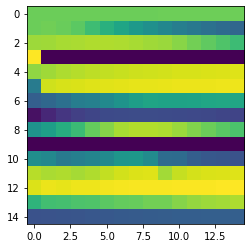

In [61]:
%matplotlib inline

x_train_cnn_sample = np.reshape(x_train_final.iloc[0].values, (IMG_WIDTH, IMG_HEIGHT))
x_train_cnn_sample.shape

# plt.plot(x_train_cnn_sample) # 這是專門畫line Plot的，會錯誤

plt.imshow(x_train_cnn_sample)
# plt.imshow(x_train_cnn_sample, origin='lower')
# plt.imshow(x_train_cnn_sample, cmap='rainbow', origin='lower')


## Save Plots

In [82]:
import os

def saveCNNInputImage(cnn_x, cnn_y_label, purpose):
    save_path = f'.\\my_thesis\\dataset_technical_cnn'
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    
    save_path = os.path.join(save_path, purpose)
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    
    for i in tqdm.tqdm_notebook(range(len(cnn_x))):
        
        y_label = int(cnn_y_label[i])
        className = "hold"
        if y_label == 1:
            className = "up"
        elif y_label == 2:
            className = "down"
        
        dirName = os.path.join(save_path, className)
        if not os.path.exists(dirName):
            os.mkdir(dirName)
        
        fileName = os.path.join(dirName, f'{i}.npy')
        np.save(fileName, cnn_x[i])

    print(f"{purpose} Done")



## 將x_train_cnn / x_cv_cnn / x_test_cnn 的.npy存到硬碟

In [83]:
dataset = {
    "train": {
        "cnn_x": x_train_cnn,
        "cnn_y_label": y_train_label
    },
    "validation": {
        "cnn_x": x_cv_cnn,
        "cnn_y_label": y_val_label
    },
    "test": {
        "cnn_x": x_test_cnn,
        "cnn_y_label": y_test_label
    }
}

for purpose, v in dataset.items():
    saveCNNInputImage(v["cnn_x"], v["cnn_y_label"], purpose)


C:\Users\LEAMON~1\AppData\Local\Temp/ipykernel_25520/3481358127.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(len(cnn_x))):


  0%|          | 0/2236 [00:00<?, ?it/s]

train Done


  0%|          | 0/639 [00:00<?, ?it/s]

validation Done


  0%|          | 0/320 [00:00<?, ?it/s]

test Done
